# **포스트 코로나 시대, 🛵 배달 음식점 가보자고! 🍚🍗🍕🥤🍔**
### - 코로나와 생활인구 데이터로 알아보는 소상공인 배달 가이드 - <br></br>

#### **목차**
* __서론__  

* __본론__  
  1. 데이터 전처리
  2. 간단한 데이터 시각화
  3. 코로나 확진자와 배달건수
  4. 서울시 시간대별 생활인구 및 배달건수-사회적 거리두기 중심으로
  5. 날씨, 코로나, 배달접수요일이 배달건수에 영향을 주는지
 
* __결론__   
   1. 분석결과 및 한계점
   2. 활용방안
   <br></br>

## __서론__

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;한국을 비롯한 전세계는 코로나 판데믹이라는 전례없는 감염병 사태를 겪고 있습니다. 2020년 1월 말부터 시작하여 2021년 8월인 지금까지 도무지 끝이 보이지 않는 길을 걷고 있죠. 코로나는 전세계인들의 일상과 인생을 뒤바꿨습니다. 그리고 우리는 코로나가 우리의 삶에 어떤 영향을 끼쳤는지에 대해 끝도 없이 이야기할 수 있을 것입니다. 여기서 조금 더 거시적인 관점으로 줌아웃하여, 코로나가 한국 사회에 끼친 영향에 대해서도 생각해보겠습니다. 그 중 하나는 바로 한국의 배달 서비스 시장입니다. 사회적 거리두기, 재택 근무, 비대면 수업... 이러한 언택트의 삶이 일상으로 자리 잡은 지금, **코로나로 인해 한국의 배달 문화가 어떻게 변했는지, 그렇다면 새로운 시대에 맞춰 소상공인들은 어떤 전략을 취해야 할지 살펴보겠습니다.** 

### **사용 데이터 목록**
* `dlvr_call.csv` (배달호출데이터)
* `popl.csv` (행정동별 생활인구 데이터)
* `StartupOrClosing_Region_ver2.csv` (업종/ 상호별 창업, 폐업 유추 데이터)
* `Time.csv` (코로나 데이터)
* `TimeAge.csv` (코로나-연령 데이터)
* `TimeGender.csv` (코로나-성별 데이터)
* `Weather.csv` (날씨데이터)
* `행정동코드_매핑정보_2018.csv` (시군구 및 행정동 코드 데이터) http://data.seoul.go.kr/

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

# 기본 시각화 라이브러리
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

In [3]:
# 시각화 라이브러리
import plotly.graph_objects as go
import plotly.express as px

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


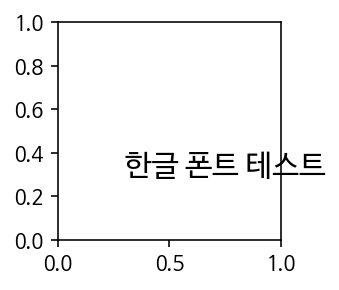

In [4]:
# 그래프 한글 폰트 설정 (한번 돌린 후 런타임 다시시작하고 다시 돌려야 제대로 나옴)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from IPython.display import set_matplotlib_formats
#폰트 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show()

## __본론__

## __본론1. 데이터 전처리__ 

### __1-1. 생활인구 데이터 전처리__

### __1-2. 배달 호출 데이터 전처리__

### __1-3. 업종 지역별 창업, 폐업 유추 데이터 전처리__

In [20]:
company_reg=pd.read_csv('StartupOrClosing_Region_ver2.csv')
company_reg['DATE']=pd.to_datetime(company_reg['DATE'],format='%Y%m%d')

In [21]:
# 경도 위도에 포함된 *** 제거
company_reg['LA_DCMLPOINT_VALUE']=company_reg['LA_DCMLPOINT_VALUE'].str.strip('***')
company_reg['LO_DCMLPOINT_VALUE']=company_reg['LO_DCMLPOINT_VALUE'].str.strip('***')
company_reg['LA_DCMLPOINT_VALUE']=company_reg['LA_DCMLPOINT_VALUE'].astype(float)
company_reg['LO_DCMLPOINT_VALUE']=company_reg['LO_DCMLPOINT_VALUE'].astype(float)

In [22]:
# 같은 명칭(경기도=경기, 전라남도=전남)이 다르게 표시된 것 통일
company_reg['BRTC_NM']=company_reg['BRTC_NM'].str.replace('경기도','경기')
company_reg['BRTC_NM']=company_reg['BRTC_NM'].str.replace('전라남도','전남')

### __1-4. 날씨 데이터__

In [23]:
w=pd.read_csv('weather.csv')
w['date']=pd.to_datetime(w['date'])
w['year']=w['date'].dt.year

In [24]:
# 2020년 서울 날씨 데이터만 추출
w20=w[w['year']==2020]
w20.drop(['year'],axis=1,inplace=True)
weather=w20[(w20['province']=='Seoul')]
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23375,10000,Seoul,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,50.0,64.4
23391,10000,Seoul,2020-01-02,1.0,-0.7,3.8,0.0,4.0,50.0,65.4
23407,10000,Seoul,2020-01-03,-0.1,-3.4,4.6,0.0,3.5,290.0,56.9
23423,10000,Seoul,2020-01-04,1.2,-2.8,6.1,0.0,4.5,50.0,50.8
23439,10000,Seoul,2020-01-05,1.3,-3.2,6.6,0.0,2.9,50.0,45.6


## __본론2. 데이터 시각화__ 

### __2-1. 업종 지역별 창업, 폐업 유추 데이터 시각화__

In [25]:
company_reg['month'],company_reg['day']=(company_reg['DATE'].dt.month, company_reg['DATE'].dt.day)

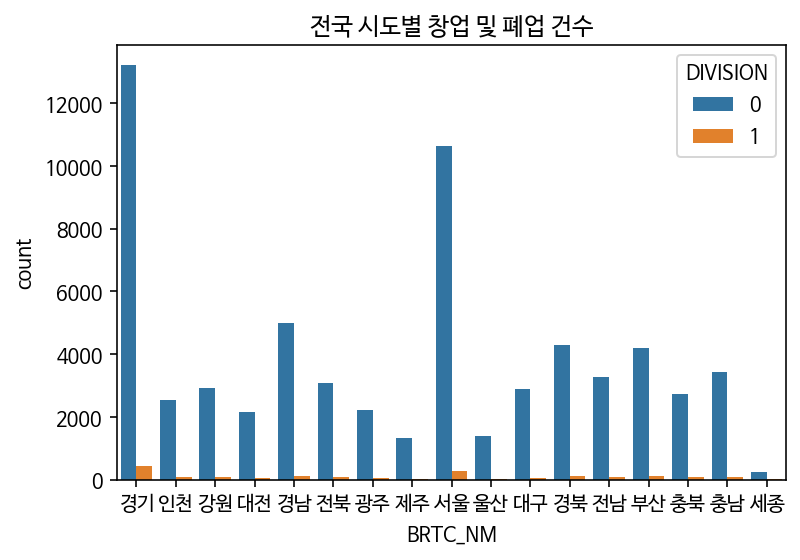

In [26]:
plt.figure()
sns.countplot(x='BRTC_NM',data=company_reg,hue='DIVISION')
plt.title('전국 시도별 창업 및 폐업 건수')
plt.show()
#0=폐업, 1=창업

* 폐업(0)수가 창업수에 비해 압도적이고 경기, 서울순의 분포를 보인다. 

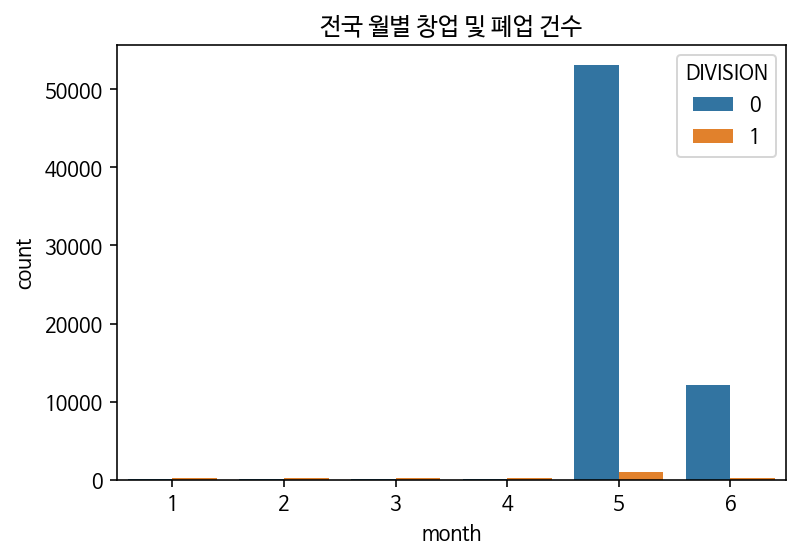

In [27]:
plt.figure()
sns.countplot(x='month',hue='DIVISION', data=company_reg)
plt.title('전국 월별 창업 및 폐업 건수')
plt.show()
# 1 = 창업, 0 = 폐업

* 폐업이 2020년 5월에 급격히 늘어났음을 알 수 있다.

In [28]:
#서울만 추출
comp_seoul=company_reg[(company_reg['BRTC_NM']=='서울')]

In [29]:
# 서울시 구별 창업 폐업 건수
comp_s_count=pd.DataFrame(comp_seoul.groupby('SIGUNGU_NM')['DIVISION'].value_counts())
comp_s_count.rename(columns={'DIVISION':'count'},inplace=True)
comp_s_count.reset_index(inplace=True)

In [30]:
# 서울시 창업만 추출
seoul_open=comp_s_count[comp_s_count['DIVISION']==1]
seoul_open.sort_values(by='count',ascending=False, inplace=True)
# 서울시 폐업만 추출
seoul_cld=comp_s_count[comp_s_count['DIVISION']==0]
seoul_cld.sort_values(by='count',ascending=False, inplace=True)

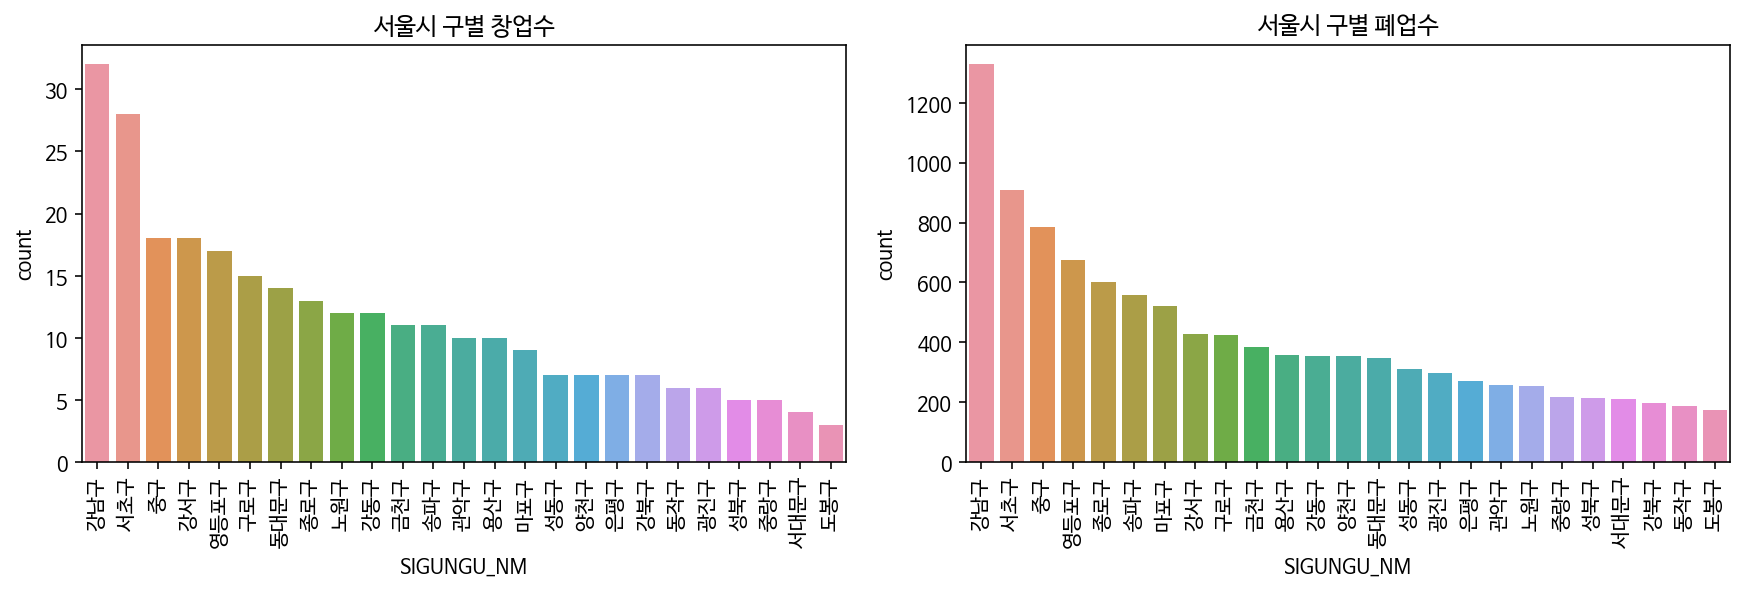

In [31]:
fig, ax= plt.subplots(figsize=(12,4),ncols=2, constrained_layout=True)
plot1= sns.barplot(data=seoul_open,x='SIGUNGU_NM',y='count', ax=ax[0])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plot2=sns.barplot(data=seoul_cld,x='SIGUNGU_NM',y='count', ax=ax[1])
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)

ax[0].set_title('서울시 구별 창업수')
ax[1].set_title('서울시 구별 폐업수')

plt.show()

* 지역구별로 창업과 폐업 점포 수가 큰 차이를 보였다. 
  - 강남구에서 창업, 폐업 건수가 가장 많았다. 
     - 창업과 폐업 건수가 많은 강남구, 서초구, 중구는 상업지가 많은 지역구라 생각할 수 있다. 
  - 도봉구는 창업, 폐업 건수가 가장 적었다.

### __2-2. 코로나 데이터 시각화__

#### Time 데이터

#### TimeAge 데이터

In [35]:
# TimeAge 데이터
time_age=pd.read_csv('TimeAge.csv')
time_age['date']=pd.to_datetime(time_age['date'])
time_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


Text(0.5, 1.0, '일별 연령대별 코로나 확진자 수')

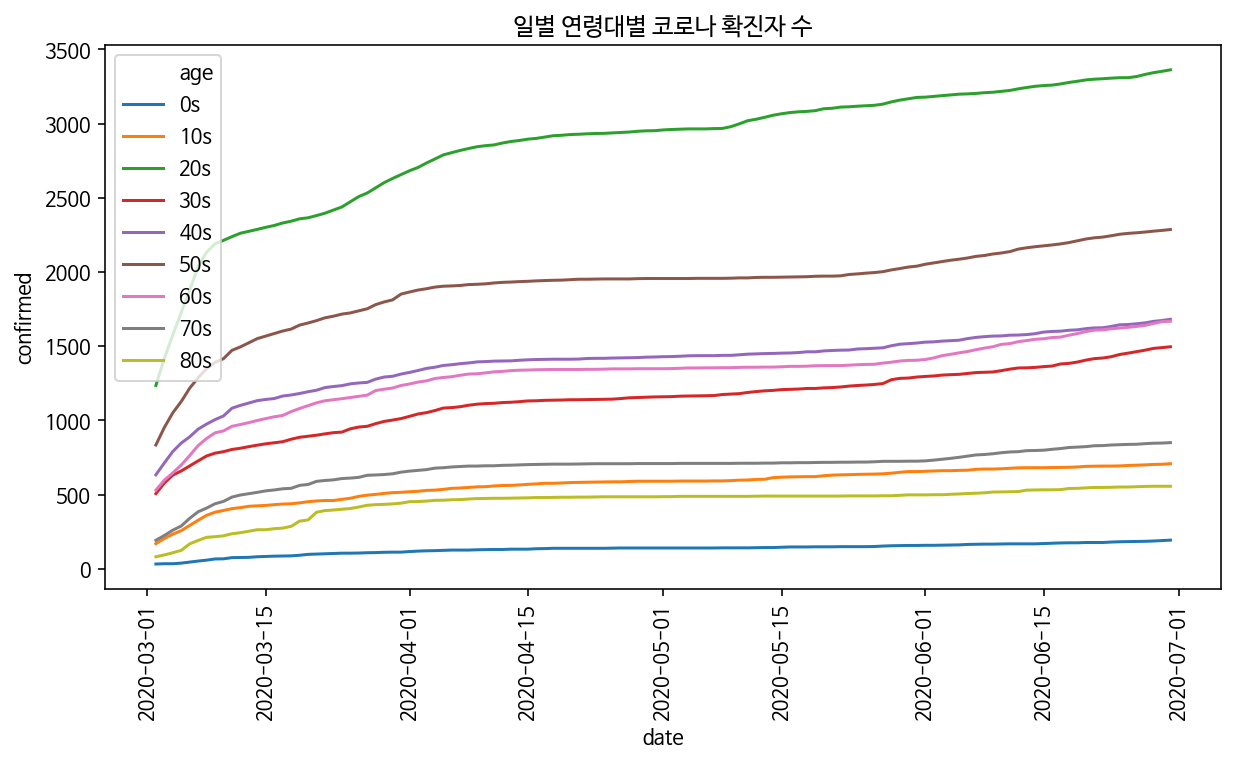

In [36]:
cor_age_day=time_age.groupby(['date','age'])['confirmed','deceased'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.lineplot(data=cor_age_day,x='date',y='confirmed',hue='age')
plt.title('일별 연령대별 코로나 확진자 수')

* 일별 코로나 확진자 수는 20대가 제일 많았고 50대가 그 뒤를 이었다.
    * 20대 >>> 50대 >> 40대 ≥ 60대 > 30대 

#### TimeGender 데이터

In [37]:
time_gender=pd.read_csv('TimeGender.csv')
time_gender['date']=pd.to_datetime(time_gender['date'])
time_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


Text(0.5, 1.0, '일별 성별 코로나 확진자 수')

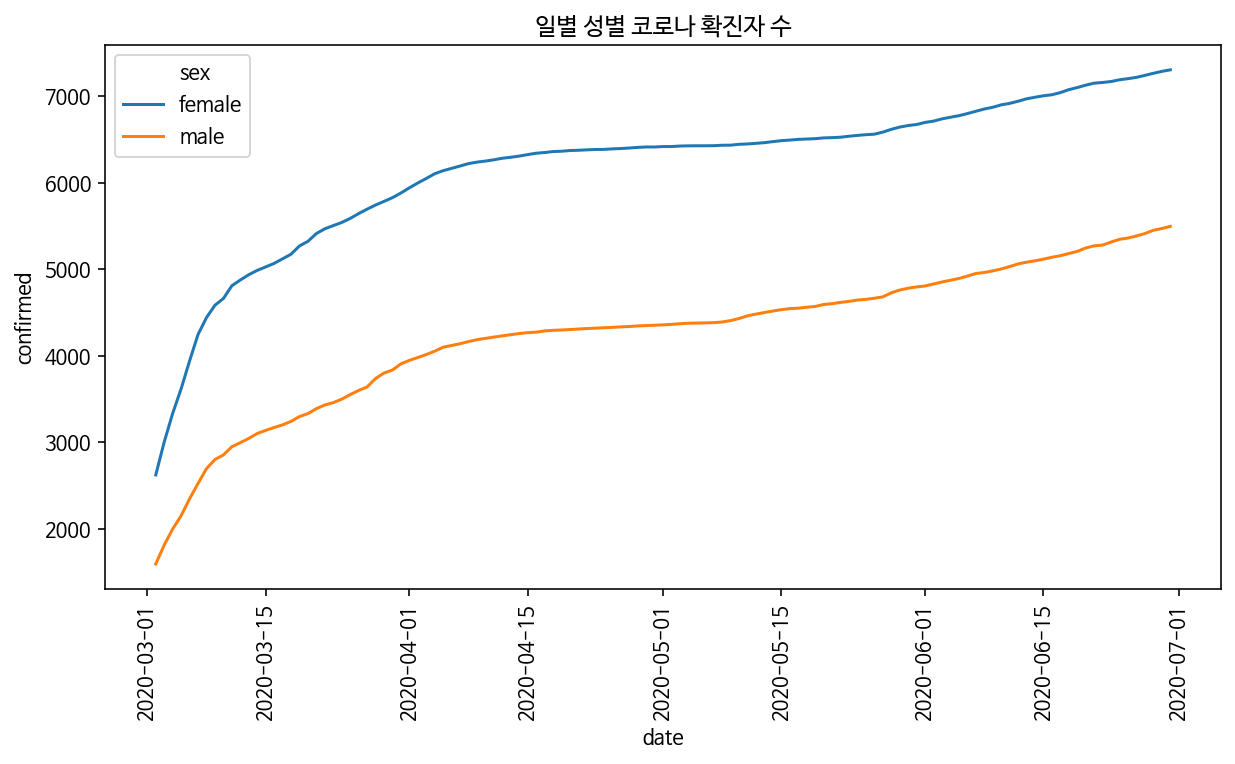

In [38]:
cor_sex_day=time_gender.groupby(['date','sex'])['confirmed','deceased'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.lineplot(data=cor_sex_day,x='date',y='confirmed',hue='sex')
plt.title('일별 성별 코로나 확진자 수')

* 일별 코로나 확진자 수는 여성이 남성보다 더 많았다.

### __2-3. 날씨 데이터 시각화__

In [39]:
# 2020년 서울 일별 평균 데이터 생성
all_wea=weather.groupby('date').mean().reset_index()
all_wea.drop(['code'],axis=1,inplace=True)
all_wea.head()

,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,50.0,64.4
1,2020-01-02,1.0,-0.7,3.8,0.0,4.0,50.0,65.4
2,2020-01-03,-0.1,-3.4,4.6,0.0,3.5,290.0,56.9
3,2020-01-04,1.2,-2.8,6.1,0.0,4.5,50.0,50.8
4,2020-01-05,1.3,-3.2,6.6,0.0,2.9,50.0,45.6


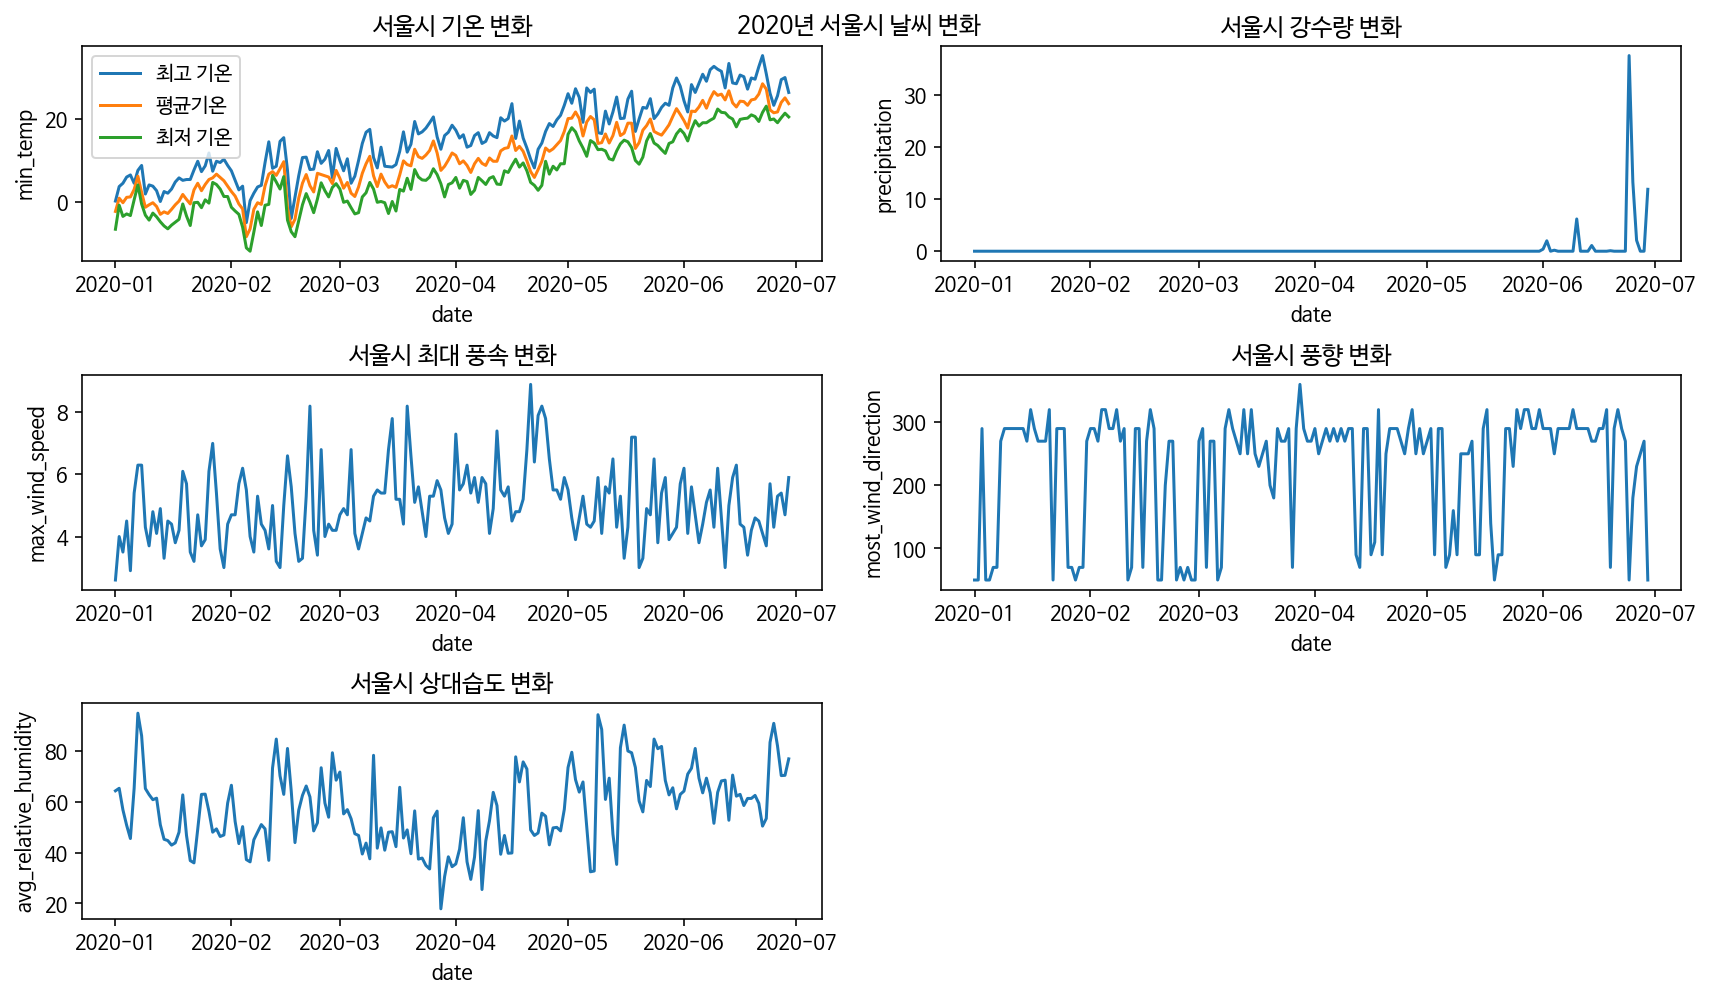

In [40]:
plt.figure(figsize=(12,7))

ax1=plt.subplot(3,2,1)
g1=sns.lineplot(data=all_wea, x='date',y='max_temp',label='최고 기온')
g2=sns.lineplot(data=all_wea, x='date',y='avg_temp',label='평균기온')
g3=sns.lineplot(data=all_wea, x='date',y='min_temp',label='최저 기온')
ax1.set_title('서울시 기온 변화')
ax1.legend(loc='upper left')

ax2=plt.subplot(3,2,2)
g4=sns.lineplot(data=all_wea, x='date',y='precipitation')
ax2.set_title('서울시 강수량 변화')

ax3=plt.subplot(3,2,3)
g5=sns.lineplot(data=all_wea, x='date',y='max_wind_speed')
ax3.set_title('서울시 최대 풍속 변화')

ax4=plt.subplot(3,2,4)
g6=sns.lineplot(data=all_wea, x='date',y='most_wind_direction')
ax4.set_title('서울시 풍향 변화')

ax5=plt.subplot(3,2,5)
g7=sns.lineplot(data=all_wea, x='date',y='avg_relative_humidity')
ax5.set_title('서울시 상대습도 변화')

plt.suptitle('2020년 서울시 날씨 변화')
plt.tight_layout()
plt.show()

### __2-4. 배달 호출 데이터 시각화__

* 사용한 데이터 
  - ` dlvr_call.csv` (배달호출데이터)
* 주어진 배달 데이터를 자세하게 살펴보기 위해 간단하게 여러가지 시각화를 해보았는데, 그 중 의미있는 인사이트를 도출할 수 있는 시각화만 모아보았다. 

#### 결제수단

#### 배달비

In [42]:
# 서울시 구별 배달비 평균 데이터셋
deliv_seoul_shop=deliv[deliv['str_sido']=='서울특별시']
seoul_fee=deliv_seoul_shop.groupby('str_sigungu')['deliv_fee'].mean().to_frame().sort_values(by='deliv_fee',ascending=False).reset_index()

Text(0.5, 1.0, '서울 구별(배달상점기준) 배달비 평균')

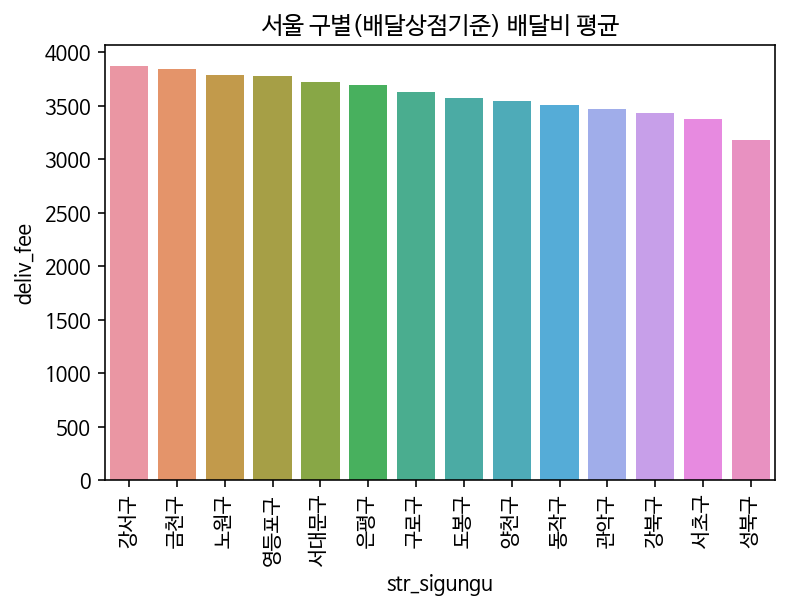

In [43]:
plt.figure()
plt.xticks(rotation=90)
sns.barplot(data=seoul_fee, x='str_sigungu',y='deliv_fee')
plt.title('서울 구별(배달상점기준) 배달비 평균')

* 서울시 배달비는 대체로 3000원에서 4000원 사이에 분포한다. 

#### 시간대별 배달 건수

In [44]:
# 배달호출데이터 시간 데이터 추출
deliv['order_hour'] = deliv['deliv_order_time'].dt.hour
deliv['caralc_hour']=deliv['deliv_time'].dt.hour
deliv['rec_hour']=deliv['deliv_rec_time'].dt.hour
deliv['compt_hour']=deliv['deliv_complt_time'].dt.hour

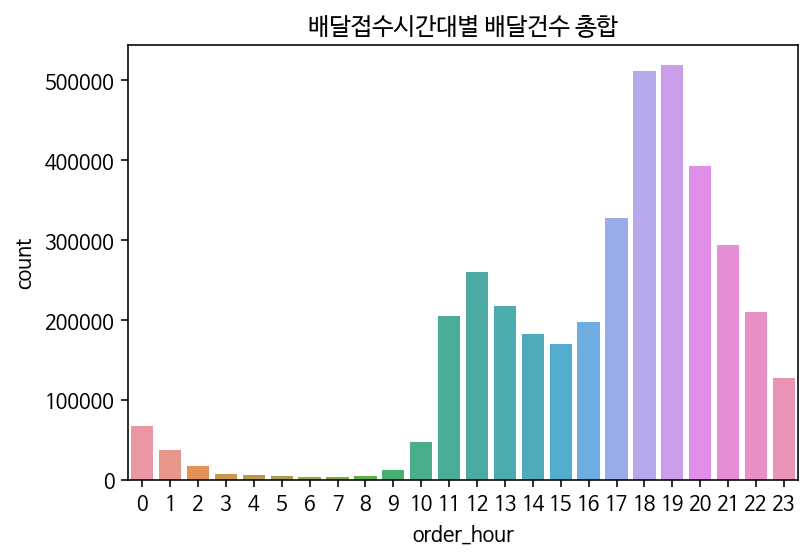

In [45]:
#배달접수시간대별 count
plt.figure()
sns.countplot(x='order_hour',data=deliv)
plt.title('배달접수시간대별 배달건수 총합')
plt.show()

* 배달 접수 시간대에 따른 배달 건수를 확인해보니, 점심보다는 저녁 시간대에 배달을 더 많이 시킨다는 것을 알 수 있다. 
  - 특히, 18시-20시에 배달접수 건수가 가장 많았다. 

#### 요일 & 월별 패턴 
* (1) 배달 건수 
* (2) 상품 금액 

(1) 배달 건수 

In [46]:
# 배달호출 데이터 월 추출
deliv['month']=deliv['date'].dt.month

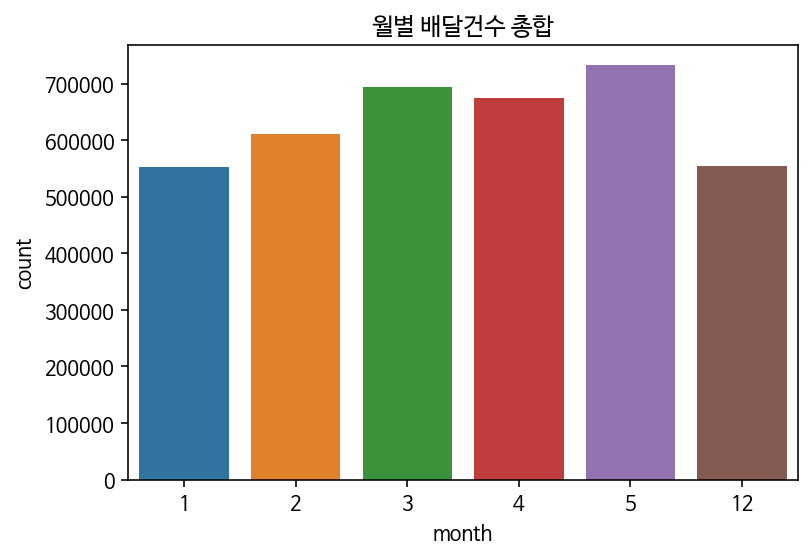

In [47]:
plt.figure()
sns.countplot(x='month',data=deliv)
plt.title('월별 배달건수 총합')
plt.show()

* 2019년 12월부터 2020년 5월까지 월별 배달건수는 증가하는 경향을 보인다.

(2) 상품 금액 

#### 배달 업종

## __본론3. 코로나 확진자와 배달건수__ 

[ 분석 내용 ] 
* 사용한 데이터 
  - `Time.csv` (코로나 데이터)
  - ` dlvr_call.csv` (배달호출데이터)
* 일별 코로나 확진자 수와 배달 건수 간 어떤 연관성이 있는지 살펴보기 위해, 시계열로 두 데이터를 시각화해보았다.  

## __본론4. 서울시 시간대별 생활인구 및 배달건수__
### - 사회적 거리두기를 중심으로 - 

###  서울시 구별 연령대 분포 비교

In [70]:
# 1) 생활인구데이터에서 필요 칼럼만 추출
popl=pop[['date','hour','gender','age_grp','sigungu','ad_dong','korean']]

In [71]:
# 2) 구별, 연령대별 생활인구 총합 
popl_age=popl.groupby(['sigungu','age_grp'])['korean'].sum().to_frame().reset_index()

In [72]:
# 3) pivot table로 연령대별 재정렬
pp_age=pd.pivot_table(popl_age,index='sigungu',columns='age_grp',values='korean')
pp_age.reset_index(inplace=True)

In [73]:
# 4) 구별 생활인구 총합 구하기
popl_age_all=popl_age.groupby('sigungu')['korean'].sum().to_frame().reset_index()

In [74]:
# 5) 각 연령대별 인구 비율 구하기

# 2번과 4번 merge
pop_age_data=pd.merge(pp_age,popl_age_all, on='sigungu',how='inner')

# 각 연령대별 인구 비율 칼럼 생성
pop_age_data['10_ratio']=(pop_age_data['10s']/pop_age_data['korean'])*100
pop_age_data['20_ratio']=(pop_age_data['20s']/pop_age_data['korean'])*100
pop_age_data['30_ratio']=(pop_age_data['30s']/pop_age_data['korean'])*100
pop_age_data['40_ratio']=(pop_age_data['40s']/pop_age_data['korean'])*100
pop_age_data['50_ratio']=(pop_age_data['50s']/pop_age_data['korean'])*100
pop_age_data['60_ratio']=(pop_age_data['60s']/pop_age_data['korean'])*100
pop_age_data['70+_ratio']=(pop_age_data['70+']/pop_age_data['korean'])*100

In [75]:
pop_age_ratio=pop_age_data[['sigungu','10_ratio','20_ratio','30_ratio','40_ratio','50_ratio','60_ratio','70+_ratio']]
pop_age_ratio['2-30 ratio']=pop_age_ratio['20_ratio']+pop_age_ratio['30_ratio']
pop_age_ratio['4-50 ratio']=pop_age_ratio['40_ratio']+pop_age_ratio['50_ratio']
age_ratio=pop_age_ratio[['sigungu','2-30 ratio','4-50 ratio']]
age_ratio

,sigungu,2-30 ratio,4-50 ratio
0,강남구,44.677166,34.704411
1,강동구,34.857493,36.816680
2,강북구,33.462817,36.444326
3,강서구,41.170115,34.255004
4,관악구,50.482791,28.472256
5,광진구,44.190586,32.929444
6,구로구,39.350495,36.092821
7,금천구,42.448694,35.869351
8,노원구,34.011103,36.464584
9,도봉구,33.173325,36.651640


In [76]:
# 2-30대 비율 높은 구 top 5
age_ratio.sort_values(by='2-30 ratio', ascending=False).head(5)

,sigungu,2-30 ratio,4-50 ratio
4,관악구,50.482791,28.472256
12,마포구,48.196828,32.284288
0,강남구,44.677166,34.704411
11,동작구,44.592095,31.432782
20,용산구,44.583280,35.143103


* **관악구**는 20-30대 비율이 가장 높았고, 4-50대 비율은 가장 낮았다. 
   - 따라서 `4-2`에서 젊은층이 많은 지역구로는 관악구를 선택하였다. 

In [77]:
# 4-50대 비율 높은 구 top5
age_ratio.sort_values(by='4-50 ratio',ascending=False).head(5)

,sigungu,2-30 ratio,4-50 ratio
18,양천구,32.792391,38.340523
23,중구,44.422722,37.676866
14,서초구,40.554404,36.922745
1,강동구,34.857493,36.816680
9,도봉구,33.173325,36.651640


* 도봉구는 40-50대 비율이 높은 편이었다.
   - 비록 5위였으나, 1-4위 지역구들의 배달 데이터가 충분하지 않았기 때문에 `4-2`에서 중장년층이 많은 지역구로 도봉구를 선택하였다. 

### [ Insight ]  
* `'연령대별 생활인구 - 서울'` 그래프를 보면, 전기간에 걸쳐 날짜별로 생활인구는 오르락 내리락하지만, 연령대별로 생활인구가 많은 순서는 크게 변하지 않는다. 
  - 늘 20대 > 30대 > 40대 > 50대의 순위가 유지되었다. 
* 하지만, 지역구별로 살펴보면 연령대별 생활인구 패턴이 다를 수 있기 때문에 4개의 지역구(아래 `4-2`)를 선택하여 더 자세히 살펴보고, 각 지역구에서 선호하는 배달 업종을 살펴보았다. 지역구별 특징을 잘 나타내면서 배달 데이터가 충분히 있는 지역으로 선택하였다. 
  - **관악구** : 20-30대의 생활인구가 많은 지역구 
  - **도봉구** : 40-50대 생활인구가 많은 지역구
  - **은평구** : `4-1`에서 `거주지`로 판단한 지역구
  - **서초구** : `4-1`에서 `상업지`로 판단한 지역구

### **4-2. 생활인구 및 선호하는 배달 업종**
[ 분석 내용 ] 
* 사용한 데이터 
    - ` dlvr_call.csv` (배달호출데이터)
    - `popl.csv` (행정동별 생활인구 데이터)
    - `행정동코드_매핑정보_2018.csv` (시군구 및 행정동 코드 데이터; 외부)
* `4-1`의 분석 결과에 따라 선택한 4개의 지역구의 연령대별 생활인구와 선호하는 배달 업종을 살펴보았다. 

#### 관악구 

관악구 시간대별 배달업종별 배달건수

In [79]:
# 배달호출데이터 도착지 기준 관악구만 추출
deliv_ga=deliv[(deliv['dest_sigungu']=='관악구')]

In [80]:
deliv_ga.set_index(deliv_ga['deliv_order_time'], inplace = True)
deliv_ga_hour=pd.DataFrame(deliv_ga.resample('1H')['str_ind'].value_counts())
deliv_ga_hour.rename(columns={'str_ind':'deliv_count'},inplace=True)
deliv_ga_hour.reset_index(inplace=True)
deliv_ga_hour['order_hour']=deliv_ga_hour['deliv_order_time'].dt.hour
deliv_ga_hour.head()

,deliv_order_time,str_ind,deliv_count,order_hour
0,2019-12-01 18:00:00,카페/디저트,9,18
1,2019-12-01 18:00:00,치킨,3,18
2,2019-12-01 18:00:00,피자,2,18
3,2019-12-01 18:00:00,족발/보쌈,1,18
4,2019-12-01 18:00:00,중식,1,18


In [81]:
ga_hour_count=deliv_ga_hour.groupby(['order_hour','str_ind'])['deliv_count'].sum().to_frame().reset_index()
ga_hour_count.head()

,order_hour,str_ind,deliv_count
0,0,분식,20
1,0,야식,34
2,0,족발/보쌈,35
3,0,중식,13
4,0,치킨,937


In [82]:
ga_hour_order = px.line(ga_hour_count, x='order_hour', y='deliv_count', color='str_ind',title='관악구(도착지) 시간대별 업종별 배달건수')
pyo.iplot(ga_hour_order )

관악구는 20대 생활인구가 늘 제일 많았던 지역구이다. 
* 관악구에서는 카페/디저트, 치킨, 패스트푸드 등 **일부 업종만을 위주로 주문**하는 것으로 보인다. 
* 10시부터 22시까지는 늘 **카페/디저트**가 압도적으로 배달건수가 높고 치킨, 패스트푸드가 그 뒤를 이었다. 
  - `2-4 배달업종 시각화`에서 봤을 때, 서울 전체에서는 카페/디저트가 선호 5위였다는 점과 비교하면, 관악구에서는 이 업종의 배달을 유난히 많이 시킨다는 것을 확인할 수 있다. 
* **패스트푸드**는 시간대와 크게 상관없이 일정한 수준으로 배달 주문을 하는 것으로 보인다. 
  - 특히 `본론4`에서 관악구는 새벽 3-6 시간대에도 배달을 꽤 시켰는데, 이 시각화를 보면 주로 **패스트푸드**를 새벽에 주문하는 것을 알 수 있다.  

#### 도봉구

* 전기간에 걸쳐 **50대 생활인구가 제일 많다** (분홍색) 
   - 50대가 압도적으로 제일 많은 것은 아니나, 서울 전체에서는 50대가 늘 4위였던 것을 고려하면, 도봉구는 50대가 많은 지역구라고 할 수 있다. 

도봉구 시간대별 배달업종별 배달건수

In [84]:
# 배달호출데이터 도착지 기준 도봉구만 추출
deliv_db=deliv[(deliv['dest_sigungu']=='도봉구')]

In [85]:
deliv_db.set_index(deliv_db['deliv_order_time'], inplace = True)
deliv_db_hour=pd.DataFrame(deliv_db.resample('1H')['str_ind'].value_counts())
deliv_db_hour.rename(columns={'str_ind':'deliv_count'},inplace=True)
deliv_db_hour.reset_index(inplace=True)
deliv_db_hour['order_hour']=deliv_db_hour['deliv_order_time'].dt.hour
deliv_db_hour.head()

,deliv_order_time,str_ind,deliv_count,order_hour
0,2019-12-01 18:00:00,분식,7,18
1,2019-12-01 18:00:00,치킨,7,18
2,2019-12-01 18:00:00,피자,7,18
3,2019-12-01 18:00:00,돈까스/일식,4,18
4,2019-12-01 18:00:00,족발/보쌈,4,18


In [86]:
db_hour_count=deliv_db_hour.groupby(['order_hour','str_ind'])['deliv_count'].sum().to_frame().reset_index()
db_hour_count.head()

,order_hour,str_ind,deliv_count
0,0,분식,6
1,0,아시안/양식,13
2,0,야식,91
3,0,족발/보쌈,70
4,0,찜탕,5


In [87]:
db_hour_order = px.line(db_hour_count, x='order_hour', y='deliv_count', color='str_ind',title='도봉구(도착지) 시간대별 업종별 배달건수')
pyo.iplot(db_hour_order)

도봉구는 50대 생활인구가 늘 제일 많았던 지역구이다. 
* 일부 업종만 집중적으로 주문했던 관악구와 달리, 도봉구에서는 **시간대별로 다양한 업종을 배달**시켰다. 
* 점심 시간에는 주로 **한식, 피자, 분식** 순서로 배달을 많이 시켰고, 저녁 시간에는 **피자, 족발/보쌈, 한식, 치킨**을 많이 시켰다. 
   - **피자, 한식**은 점심과 저녁 모두에서 상위권을 유지했다. 
   - **족발/보쌈**은 저녁 시간에만 상위권을 유지했다. 

### 은평구

* 서울 전체로 보면 1-4위가 20, 30, 40, 50대 순서였는데 (`4-1`), 은평구는 20-50대의 비율이 크게 다르지 않다. 

은평구 시간대별 배달업종별 배달건수

In [89]:
deliv_ep=deliv[deliv['dest_sigungu']=='은평구']

In [90]:
# 배달호출데이터 도착지 기준 은평구만 추출
deliv_ep.set_index(deliv_ep['deliv_order_time'], inplace = True)
deliv_ep_hour=pd.DataFrame(deliv_ep.resample('1H')['str_ind'].value_counts())
deliv_ep_hour.rename(columns={'str_ind':'deliv_count'},inplace=True)
deliv_ep_hour.reset_index(inplace=True)
deliv_ep_hour['order_hour']=deliv_ep_hour['deliv_order_time'].dt.hour
deliv_ep_hour.head()

,deliv_order_time,str_ind,deliv_count,order_hour
0,2019-12-01 18:00:00,족발/보쌈,11,18
1,2019-12-01 18:00:00,돈까스/일식,6,18
2,2019-12-01 18:00:00,분식,5,18
3,2019-12-01 18:00:00,치킨,5,18
4,2019-12-01 18:00:00,한식,1,18


In [91]:
ep_hour_count=deliv_ep_hour.groupby(['order_hour','str_ind'])['deliv_count'].sum().to_frame().reset_index()
ep_hour_count.head()

,order_hour,str_ind,deliv_count
0,0,돈까스/일식,46
1,0,분식,136
2,0,족발/보쌈,292
3,0,치킨,731
4,0,한식,29


In [92]:
ep_hour_order = px.line(ep_hour_count, x='order_hour', y='deliv_count', color='str_ind',title='은평구(도착지) 시간대별 업종별 배달횟수')
pyo.iplot(ep_hour_order)

* 시간대별 차이는 있으나 **치킨**이 제일 배달건수가 높고 **족발/보쌈, 돈까스/일식**이 그 뒤를 이었다. 
   - 20대 생활인구가 압도적으로 많았던 관악구와 달리, 은평구에서는 카페/디저트를 거의 배달시키지 않았다. 

#### 서초구  

서초구 시간대별 배달업종별 배달건수

In [94]:
# 배달호출데이터 도착지 기준 서초구만 추출
deliv_sc=deliv[deliv['dest_sigungu']=='서초구']

In [95]:
deliv_sc.set_index(deliv_sc['deliv_order_time'], inplace = True)
deliv_sc_hour=pd.DataFrame(deliv_sc.resample('1H')['str_ind'].value_counts())
deliv_sc_hour.rename(columns={'str_ind':'deliv_count'},inplace=True)
deliv_sc_hour.reset_index(inplace=True)
deliv_sc_hour['order_hour']=deliv_sc_hour['deliv_order_time'].dt.hour
deliv_sc_hour.head()

,deliv_order_time,str_ind,deliv_count,order_hour
0,2019-12-01 18:00:00,치킨,2,18
1,2019-12-01 18:00:00,족발/보쌈,1,18
2,2019-12-01 19:00:00,치킨,6,19
3,2019-12-01 20:00:00,치킨,1,20
4,2019-12-01 20:00:00,피자,1,20


In [96]:
sc_hour_count=deliv_sc_hour.groupby(['order_hour','str_ind'])['deliv_count'].sum().to_frame().reset_index()
sc_hour_count.head()

,order_hour,str_ind,deliv_count
0,0,치킨,93
1,0,패스트푸드,57
2,0,피자,10
3,1,치킨,50
4,1,패스트푸드,64


In [97]:
sc_hour_order = px.line(sc_hour_count, x='order_hour', y='deliv_count', color='str_ind',title='서초구(도착지) 시간대별 업종별 배달횟수')
pyo.iplot(sc_hour_order)

* 관악구와 비슷하게 서초구에서도 **일부 업종만을 집중적으로 배달**시켰는데, 주로 **치킨**과 **패스트푸드**였다. 
  - 치킨은 주로 저녁시간에 배달시켰지만, 패스트푸드는 점심과 저녁시간 모두에서 배달을 많이 시켰다. 
* 다만, 서초구는 다른 세 지역구보다 배달 데이터가 적었다 (Y축 배달 건수). 

## __본론5. 날씨, 코로나, 요일이 배달건수에 영향을 주는가__

날씨(기온, 강수량, 풍향, 풍속, 상대습도), 코로나 확진자, 배달접수 요일이 배달건수에 영향을 주는지 배달건수를 타겟변수로 하여 XGB (xgboost) 모델로 훈련시켰다.

### 1) 모델링 데이터셋 생성

In [98]:
# 일별 업종별 배달건수 데이터셋
dlvr=deliv[(deliv['month']!=12)& (deliv['str_sido']=='서울특별시')]
dlvr.set_index(dlvr['deliv_order_time'],inplace=True)
dlvr_day_count=pd.DataFrame(dlvr.resample('1D')['str_ind'].value_counts())
dlvr_day_count.rename(columns={'str_ind':'deliv_count'},inplace=True)
dlvr_day_count.reset_index(inplace=True)
dlvr_day_count['dow']=dlvr_day_count['deliv_order_time'].dt.weekday+1
dlvr_day_count.columns=['date','str_ind','배달건수','요일']
dlvr_day_count.head()

,date,str_ind,배달건수,요일
0,2020-01-01,치킨,1503,3
1,2020-01-01,분식,717,3
2,2020-01-01,카페/디저트,625,3
3,2020-01-01,한식,446,3
4,2020-01-01,패스트푸드,437,3


In [99]:
df=dlvr_day_count.groupby('date')['배달건수'].sum().reset_index()
df['dow']=df['date'].dt.weekday+1
df.columns=['date','배달건수','요일']

# 배달데이터와 날씨데이터 결합
weather_deliv=pd.merge(all_wea,df,left_on='date',right_on='date',how='inner')

In [100]:
# 코로나 일별 확진자수 데이터
time_new=time.groupby(['date'])['new'].sum().reset_index()

In [101]:
# 데이터셋 생성
wea_co_deliv=pd.merge(time_new,weather_deliv, on='date', how='inner')
wea_co_deliv.rename(columns={'new':'corona_count'},inplace=True)
wea_co_deliv.head()

,date,corona_count,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,배달건수,요일
0,2020-01-20,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8,3314,1
1,2020-01-21,0,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9,3434,2
2,2020-01-22,0,3.0,-0.1,7.8,0.0,3.2,50.0,36.0,3559,3
3,2020-01-23,0,4.6,0.0,9.9,0.0,4.7,290.0,49.3,4199,4
4,2020-01-24,1,2.8,-1.3,7.4,0.0,3.7,290.0,63.0,3728,5


### 2) XGBoost Regressor

In [102]:
# 모델링 관련 라이브러리 호출
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [103]:
X=wea_co_deliv[['corona_count','avg_temp','min_temp','max_temp','precipitation','max_wind_speed','most_wind_direction','avg_relative_humidity','요일']]
y=wea_co_deliv['배달건수']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
xgb_reg = xgb.XGBRegressor(n_estimators=500, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=0.75,max_depth=5)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
pred=xgb_reg.predict(X_test)
r_square=xgb_reg.score(X_train,y_train)
print(r_square)

0.9999999961757973


In [106]:
mean_absolute_error(y_test,pred)

721.3708857783565

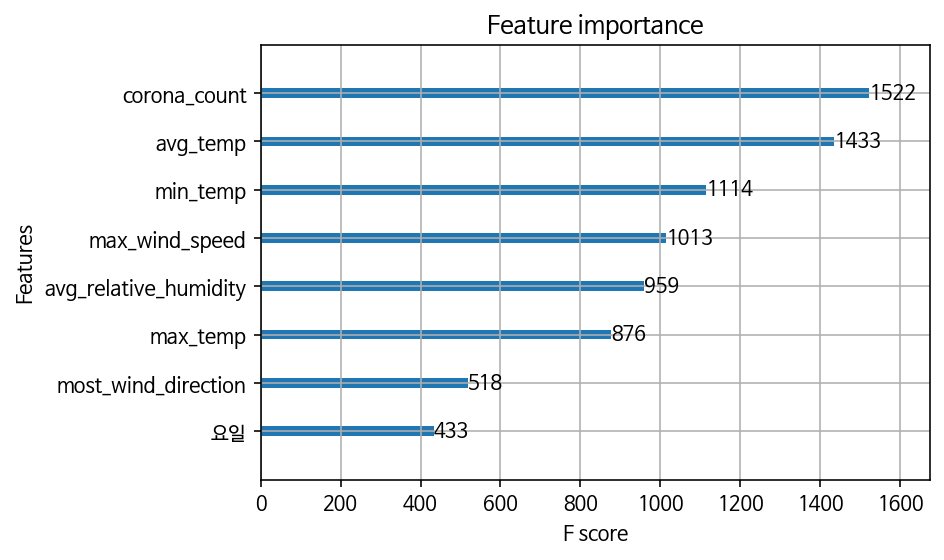

In [107]:
xgb.plot_importance(xgb_reg)

# corona_count= 코로나 확진자(일별)
# avg_temp= 평균기온(일별)
# avg_relative_humidity= 평균 상대습도(일별)
# min_temp= 최저기온(일별)
# max_wind_speed= 최대풍속(일별)
# max_temp=최대기온(일별)
# 요일= 배달요일
# most_wind_direction=풍향(일별)

* Feature importance 결과, 코로나 확진자수, 기온(평균, 최저, 최고), 상대습도, 풍향, 풍속 8개 피쳐 중  코로나 확진자수가 배달건수에 가장 큰 영향을 미친다는 것을 알 수 있다. 
* 평균 기온, 상대 습도 등 날씨 또한 배달건수에 영향을 미쳤다. 

## __결론__

## __결론1. 분석 결과 및 한계점__

### 분석결과
다음은 본 분석에서 얻은 인사이트를 키워드별로 정리한 내용이다. 
<br></br>
### **1) 배달 데이터 파헤치기**  
 * 배달 주문 시, 사람들이 선호하는 결제 방식은 주로 **선불**이었다. 
 * **20년 상반기 동안 월별 배달 건수는 서서히 증가**하는 경향을 보였다. 
 * 사람들은 **금,토,일요일에 더 많은 배달을 시켰고, 더 비싼 음식을 주문**했다. 
    - 배달 건수는 일요일과 5월에 많은 편이었다. 
    - 주문 금액을 보면, 주로 토요일과 5월에 비싼 음식을 시켰다. 
<br></br>

### **2) 생활인구와 배달 - 각 지역의 특성을 중심으로** 
* 생활인구 데이터 분석 결과, 각 지역구의 생활인구는 다양한 특성을 보였다. 그리고 그 특성에 따라 선호하는 배달 업종도 차이를 보였다. <br></br>

| 지역구 | 주요 연령대  | 특성  | 선호 배달업종 |
|:---:|:-:|:-:|---|
| **관악구**    | **20-30대**  | 거주지  | (소수) 카페/디저트, 치킨, 패스트푸드  |
| **도봉구**    |   **50대**  | 거주지  | (다수) 피자, 족발/보쌈, 한식, 치킨, 분식 등  |
| **은평구**    | 20-50대| **거주지**  | (다수) 치킨, 족발/보쌈, 회, 돈가스/일식, 분식 등  |
| **서초구**    | 20-50대  | **상업지** | (소수) 치킨, 패스트푸드   ||

   - 관악구
      - **20-30대** 생활인구의 비율이 1위였고 날짜별 20대의 생활인구가 압도적으로 제일 많았던 지역구이다. 
      - 배달호출 데이터에서 알 수 있는 14개의 업종 중, 관악구에서는 **카페/디저트, 치킨**이 일관되게 선호되었다. 인기있는 업종이 4개 정도로 소수뿐이었다. 
      - 젊은 지역구답게, 새벽시간대에도 배달을 많이 시켰는데 이때는 거의 패스트푸드를 주문하였다. 
   - 도봉구 
      - **50대** 생활인구가 도봉구에서는 늘 1위였다. 서울 전체에서는 4위였다는 점과 대조적이다. 
      - 배달 주문한 업종은 다양하게 나타났으며, 점심 시간대에는 주로 한식, 피자, 분식이 인기였고 저녁 시간대에는 피자, 족발/보쌈, 한식, 치킨이었다.  
   - 은평구 
      - 시간대별 총 생활인구를 보면, 밤~새벽 시간대가 낮 시간대보다 많았으므로 **거주지**라고 볼 수 있다. 
      - 도봉구와 비슷하게, 다양한 업종을 배달 주문하였다. **점심보다는 저녁 시간대에 배달을 시키는 경향**을 보였는데, 저녁 때에는 주로 치킨, 족발/보쌈을 주문하였다. 
   - 서초구 
      - 시간대별 총 생활인구를 보면, 낮 시간대가 밤~새벽 시간대보다 많았으므로 **상업지**라고 볼 수 있다. 
      - 관악구와 비슷하게, 주로 배달한 음식이 단 2개로 소수였다. 점심 때는 **패스트푸드**가, 저녁 때는 **치킨**이 제일 인기가 많았는데 이 두 업종만이 서초구에서 배달시킨 주된 음식이었다. 
<br></br>

### **3) 코로나와 배달 간 관계** 
* 일별 코로나 확진자와 배달 건수를 단순히 시계열로 시각화하였을 때에는 두 요인 간 연관성을 찾기 어려웠다. 
* 하지만 날씨 요인, 코로나 확진자, 배달 접수 요일을 독립변수로, 배달건수를 타겟변수로 한 **XGBoost 모델링을 한 결과, 코로나 확진자수가 배달건수에 가장 큰 영향을 미친다**는 것을 확인하였다. 

### 한계점

* 코로나 전후 비교 불가능 
   - 배달 데이터와 생활인구 데이터는 2020년부터만 제공되었기 때문에 코로나 판데믹 이전과 이후는 비교할 수 없었다 (예. 2019년 vs 2020년). 
* 코로나가 장기화되었던 시기에 대한 분석 불가능 
   - 대부분의 데이터가 2020년 상반기에만 한정되어, 코로나19가 장기화되었던 20년 하반기와 21년 상반기에도 본 분석결과와 동일하게 나타날지는 확인할 수 없었다. 
   - 대략 6개월 동안의 데이터만 있었기 때문에, 계절성은 확인하기 어려웠다. 
* 서울시 한정의 생활인구 
   - 생활인구 데이터는 서울시만 제공되어, 전국구 단위로는 분석할 수 없었다. 
* 특정 지역구에 집중되었던 배달 데이터 
   - 배달 데이터에는 강남구, 종로구, 용산구 등 일부 지역의 데이터가 거의 없었기 때문에 본 분석의 대상이 제한적이었다. 
       - 특히 생활인구가 제일 많았던 강남구의 배달 데이터가 부족하여 아쉬웠다. 
* 음식점 구분이 안 되어 있던 창업 및 폐업 데이터
  - 창업 및 폐업 데이터의 업종은 음식점만이 아니라, 의료기관이나 부동산 등 몇 백개의 업종을 통합하여 하나의 칼럼으로 제공하고 있었기 때문에 음식점 카테고리만 따로 추출하기가 어려웠다. 

## __결론2. 활용방안__

본 분석의 결과들은 차후 창업 예정인 업주 혹은 현재 음식점을 운영 중인 소상공인들에게 실용적인 인사이트를 제공한다. 본 분석은 **데이터에 기반한 배달 소비 패턴을 파악하여, 지역구별 배달 수요를 예측하는 서비스를 제공**하는 데에 쓰일 수 있다. 소상공인들은 다음과 같은 질문에 답을 얻을 수 있을 것이다. 
  * 내 가게 근처에는 어떤 잠재적인 소비자들이 살고 있을까? 
  * 어떤 지역까지 배달을 하면 가장 이익이 될까? 
  * 이 지역에서는 주로 어떤 요일 혹은 달에 배달을 많이 시킬까? 
  * 내 가게 근처의 소비자들은 어떤 음식을 좋아할까? 
  * 내가 파는 음식은 주로 어떤 시간대에 주문이 접수될까? 
  * 내가 파는 음식을 좋아할만한 잠재적 소비자들은 주로 어디에 있을까? 